- **Dataset**: https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset

- **Unsupervised Learning**: An ML approach to finding patterns in data with no overseeing instruction
- **K-means Clustering**: An algorithm that groups data points into K clusters
- **Elbow Method**: A method for finding the optimal value for K

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customer_data = pd.read_csv("customer_data.csv")
seed = 42

Step 1: Remove Customer ID, City, Membership Type, Satisfaction Level, and Days Since Last Purchase from the dataset 
Step 2: Convert Gender and Discount Applied columns to 0 and 1

In [ ]:
df = customer_data.drop(["Customer ID", "City", "Days Since Last Purchase", "Membership Type", "Satisfaction Level"], axis=1)

df.rename(columns = {"Gender": "Is Male"}, inplace=True)
df["Is Male"] = (df['Is Male'] == 'Male').astype(int) # Convert series of "Male" | "Female" into "TRUE" | "FALSE" and then into "1" and "0"
df['Discount Applied'] = (df['Discount Applied']).astype(int)

display(df)


,Is Male,Age,Total Spend,Items Purchased,Average Rating,Discount Applied
0,0,29,1120.20,14,4.6,1
1,1,34,780.50,11,4.1,0
2,0,43,510.75,9,3.4,1
3,1,30,1480.30,19,4.7,0
4,1,27,720.40,13,4.0,1
...,...,...,...,...,...,...
345,1,32,660.30,10,3.8,1
346,0,36,470.50,8,3.0,0
347,0,30,1190.80,16,4.5,1
348,1,34,780.20,11,4.2,0


In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

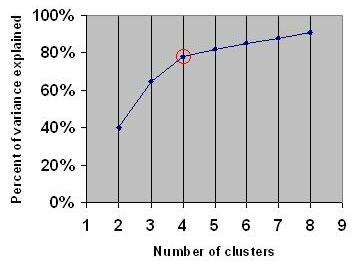

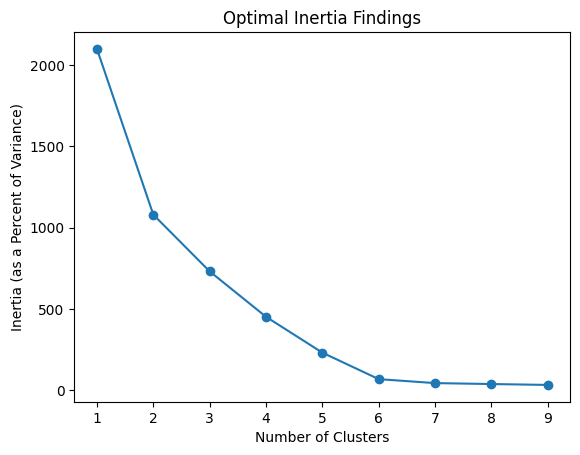

In [16]:
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias, marker = 'o')
plt.title('Optimal Inertia Findings')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (as a Percent of Variance)')
plt.show()

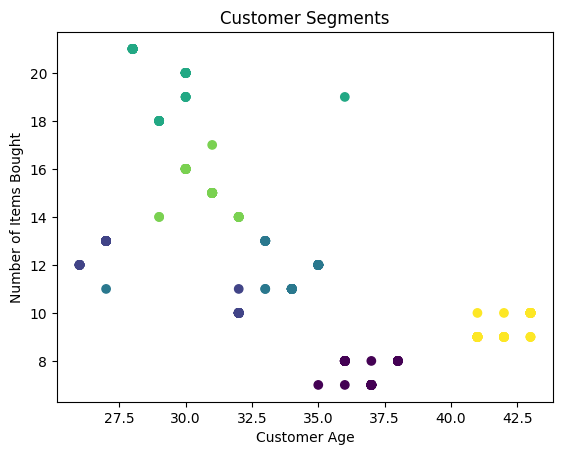

In [17]:
cluster_analysis = KMeans(n_clusters=6, random_state=seed)

categories = cluster_analysis.fit_predict(scaled_data)
customer_data['Customer Category'] = categories #add a column of data that assigns the cluster number to the row
df['Customer Category'] = categories

plt.scatter(customer_data['Age'], customer_data['Items Purchased'], c=df['Customer Category'], cmap='viridis')

plt.title('Customer Segments')
plt.xlabel('Customer Age')
plt.ylabel('Number of Items Bought')
plt.show()



In [22]:
columns = ["Age", "Total Spend", "Items Purchased", "Average Rating"]

customer_group_0 = customer_data[customer_data["Customer Category"] == 0]
customer_group_0.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Customer Category
5,106,Female,37,Houston,Bronze,440.8,8,3.1,False,22,Neutral,0
11,112,Female,36,Houston,Bronze,470.5,7,3.2,False,20,Neutral,0
17,118,Female,38,Houston,Bronze,450.9,8,3.0,False,25,Neutral,0
23,124,Female,37,Houston,Bronze,430.8,7,3.4,False,23,Neutral,0
29,130,Female,36,Houston,Bronze,460.5,8,3.1,False,19,Neutral,0


In [23]:
customer_group_1 = customer_data[customer_data["Customer Category"] == 1]
customer_group_1.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Customer Category
4,105,Male,27,Miami,Silver,720.4,13,4.0,True,55,Unsatisfied,1
10,111,Male,32,Miami,Silver,690.3,11,3.8,True,34,Unsatisfied,1
16,117,Male,26,Miami,Silver,700.6,12,3.7,True,48,Unsatisfied,1
22,123,Male,27,Miami,Silver,710.4,13,4.1,True,54,Unsatisfied,1
28,129,Male,32,Miami,Silver,670.3,10,3.8,True,33,Unsatisfied,1


In [45]:
customer_group_1.describe()

group_number = 4

aggregates = df[df["Customer Category"] == group_number]["Is Male"].agg(["sum", "count"])

In [46]:
print(f"Percentage of Group {group_number} that is Male: ", aggregates['sum'] / aggregates['count'] * 100)

Percentage of Group 4 that is Male:  1.6666666666666667


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [48]:
filter1 = df["Customer Category"] == 1
X_1 = df[filter1].drop("Total Spend", axis=1)
y_1 = df[filter1]["Total Spend"]

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=seed)

#Analyze!
rf_1_model = RandomForestRegressor(n_estimators=100, random_state=seed)
rf_1_model.fit(X_1_train, y_1_train)

#Evaluate!
rf_1_predictions = rf_1_model.predict(X_1_test)
rf_1_mae = mean_absolute_error(y_1_test, rf_1_predictions)
print("MAE for Analysis on Customer Group 1: ", rf_1_mae)

MAE for Analysis on Customer Group 1:  4.915304128197619


In [49]:
def print_mae(customer_group):
    filter1 = df["Customer Category"] == customer_group
    X_1 = df[filter1].drop("Total Spend", axis=1)
    y_1 = df[filter1]["Total Spend"]

    X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=seed)

    #Analyze!
    rf_1_model = RandomForestRegressor(n_estimators=100, random_state=seed)
    rf_1_model.fit(X_1_train, y_1_train)

    #Evaluate!
    rf_1_predictions = rf_1_model.predict(X_1_test)
    rf_1_mae = mean_absolute_error(y_1_test, rf_1_predictions)
    print(f"MAE for Analysis on Customer Group {customer_group}: ", rf_1_mae)

In [51]:
for group in range(0, 6):
    print_mae(group)

MAE for Analysis on Customer Group 0:  8.127005365005308
MAE for Analysis on Customer Group 1:  4.915304128197619
MAE for Analysis on Customer Group 2:  5.517581500818636
MAE for Analysis on Customer Group 3:  8.694333271709278
MAE for Analysis on Customer Group 4:  14.43919633809052
MAE for Analysis on Customer Group 5:  5.7024551198746805
